In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [9]:
df = pd.read_csv("data/top2kcompanynames.csv",index_col=None)

In [17]:
df[:1000]['total_filings'].sum()

2154850.0

In [18]:
df[1000:]['total_filings'].sum()

367747.0

In [ ]:
df['total_filings'][:1000].sum

In [11]:
df['total_filings'].sum()

2522597.0

In [12]:
df.rename( columns={'Unnamed: 0':'index'}, inplace=True )
df['year'] = df['year'].astype(dtype = int, errors = 'ignore')

In [4]:
df.groupby(['year','employer']).filter(lambda x : len(x) >10).count()

index          3793
employer       3793
job title      3793
base salary    3793
location       3793
submit date    3793
start date     3793
state          3793
year           3793
month          3793
dtype: int64

In [13]:
df

,index,employer,job title,base salary,location,submit date,start date,state,year,month
0,0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,45980.0,ORLANDO FL,2020-04-09,2020-10-01,FL,2020.0,4.0
1,1,PERCOLATA CORPORATION,DATA SCIENTIST,46060.0,PALO ALTO CA,2016-03-18,2016-09-02,CA,2016.0,3.0
2,2,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,FORT LEE NJ,2015-02-18,2015-08-20,NJ,2015.0,2.0
3,3,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,FORT LEE NJ,2015-02-18,2015-08-20,NJ,2015.0,2.0
4,4,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,50000.0,JOHNS CREEK GA,2017-03-16,2017-09-01,GA,2017.0,3.0
...,...,...,...,...,...,...,...,...,...,...
13122,13122,CITADEL AMERICAS LLC,DATA SCIENTIST,300000.0,NEW YORK NY,2019-10-08,2019-11-11,NY,2019.0,10.0
13123,13123,NETFLIX INC,DATA SCIENTIST,360000.0,LOS GATOS CA,2019-11-19,2019-11-30,CA,2019.0,11.0
13124,13124,TAGUP INC,DATA SCIENTIST,870000.0,SOMERVILLE MA,2020-03-27,2020-09-19,MA,2020.0,3.0
13125,13125,FACEBOOK INC,DATA SCIENTIST,1250000.0,MENLO PARK CA,2020-04-15,2020-05-25,CA,2020.0,4.0


In [36]:
df_grouped = df.groupby(['year','employer','base salary','location','state','job title','submit date','start date','month']).count().reset_index().sort_values(by='index', ascending=False)


In [52]:
df_grouped =df[['year','employer','index']].groupby(['year','employer']).count().reset_index().sort_values(by='index', ascending=False)


In [53]:
df_fb = df_grouped[df_grouped.employer == 'FACEBOOK INC']
df_fb

,year,employer,index
4977,2021.0,FACEBOOK INC,249
3908,2020.0,FACEBOOK INC,168
1758,2018.0,FACEBOOK INC,151
2763,2019.0,FACEBOOK INC,141
1024,2017.0,FACEBOOK INC,60
498,2016.0,FACEBOOK INC,37
154,2015.0,FACEBOOK INC,28
15,2014.0,FACEBOOK INC,9


Text(0.5, 1.0, 'Facebook H1-B applications for Data Scientsit by year')

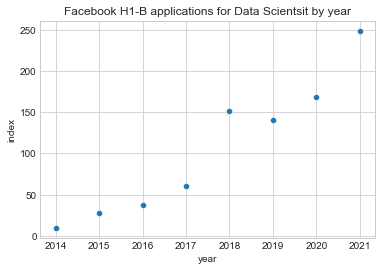

In [62]:
sns.scatterplot(data= df_fb, x = 'year', y = 'index')
plt.title('Facebook H1-B applications for Data Scientsit by year')